In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, silhouette_score, r2_score

# Load datasets
lg_data = pd.read_csv('LG_dataset.csv')
competitor_data = pd.read_csv('Competitor_Samsung.csv')
customer_data = pd.read_csv('Customers.csv')

# Display the first few rows of each dataset
print(lg_data.head())
print(competitor_data.head())
print(customer_data.head())

         order_id        Date   ship_date       customer   manufactory  \
0  US-2020-103800  01/03/2019  01/07/2019  Darren Powers  Message Book   
1  US-2020-112326  01/04/2019  01/08/2019  Phillina Ober           GBC   
2  US-2020-112326  01/04/2019  01/08/2019  Phillina Ober         Avery   
3  US-2020-112326  01/04/2019  01/08/2019  Phillina Ober         SAFCO   
4  US-2020-141817  01/05/2019  01/12/2019     Mick Brown         Avery   

                                        product_name      segment  \
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...     Consumer   
1         GBC Standard Plastic Binding Systems Combs  Home Office   
2                                          Avery 508  Home Office   
3                      SAFCO Boltless Steel Shelving  Home Office   
4  Avery Hi-Liter EverBold Pen Style Fluorescent ...     Consumer   

          category subcategory   region    zip          city         state  \
0  Office Supplies       Paper  Central  77095       Houston  

In [91]:
# Strip any leading/trailing spaces from column names
lg_data.columns = lg_data.columns.str.strip()
competitor_data.columns = competitor_data.columns.str.strip()
customer_data.columns = customer_data.columns.str.strip()

# Ensure the 'Price' and 'Sales' columns are treated as strings and then convert to float
lg_data['Price'] = lg_data['Price'].astype(str).str.replace(',', '').astype(float)
lg_data['Sales'] = lg_data['Sales'].astype(str).str.replace(',', '').astype(float)
competitor_data['Price'] = competitor_data['Price'].astype(str).str.replace(',', '').astype(float)
customer_data['Average_Spend'] = customer_data['Average_Spend'].astype(str).str.replace(',', '').astype(float)

# Convert 'Date' to datetime
if 'Date' in lg_data.columns:
    lg_data['Date'] = pd.to_datetime(lg_data['Date'])

# If columns exist, convert 'Date' to datetime
if 'Date' in lg_data.columns:
    lg_data['Date'] = pd.to_datetime(lg_data['Date'], errors='coerce')
if 'Date' in competitor_data.columns:
    competitor_data['Date'] = pd.to_datetime(competitor_data['Date'], errors='coerce')

# Print data types to verify conversion
print("LG Data Types:\n", lg_data.dtypes)
print("Competitor Data Types:\n", competitor_data.dtypes)

print("LG Data Columns:", lg_data.columns)
print("Competitor Data Columns:", competitor_data.columns)
print("Customer Data Columns:", customer_data.columns)

LG Data Types:
 order_id                 object
Date             datetime64[ns]
ship_date                object
customer                 object
manufactory              object
product_name             object
segment                  object
category                 object
subcategory              object
region                   object
zip                       int64
city                     object
state                    object
country                  object
discount                float64
profit                   object
quantity                float64
Sales                   float64
profit_margin            object
Price                   float64
dtype: object
Competitor Data Types:
 id                             object
Price                         float64
prices.amountMin              float64
prices.availability            object
prices.condition               object
prices.currency                object
Date                   datetime64[ns]
prices.isSale                    bool
pr

C:\Users\check\AppData\Local\Temp\ipykernel_19400\1673169288.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  competitor_data['Date'] = pd.to_datetime(competitor_data['Date'], errors='coerce')


                                Date           zip     discount     quantity  \
count                           9994   9994.000000  9994.000000  9994.000000   
mean   2021-04-30 05:17:08.056834048  55190.371723     0.156203     3.789574   
min              2019-01-03 00:00:00   1040.000000     0.000000     1.000000   
25%              2020-05-23 00:00:00  23223.000000     0.000000     2.000000   
50%              2021-06-26 00:00:00  56430.500000     0.200000     3.000000   
75%              2022-05-14 00:00:00  90008.000000     0.200000     5.000000   
max              2022-12-30 00:00:00  99301.000000     0.800000    14.000000   
std                              NaN  32063.705315     0.206452     2.225110   

              Sales        Price  
count   9994.000000  9994.000000  
mean     229.858022    60.918959  
min        0.440000     0.340000  
25%       17.280000     5.470000  
50%       54.490000    16.270000  
75%      209.940000    63.940000  
max    22638.480000  3773.080000  

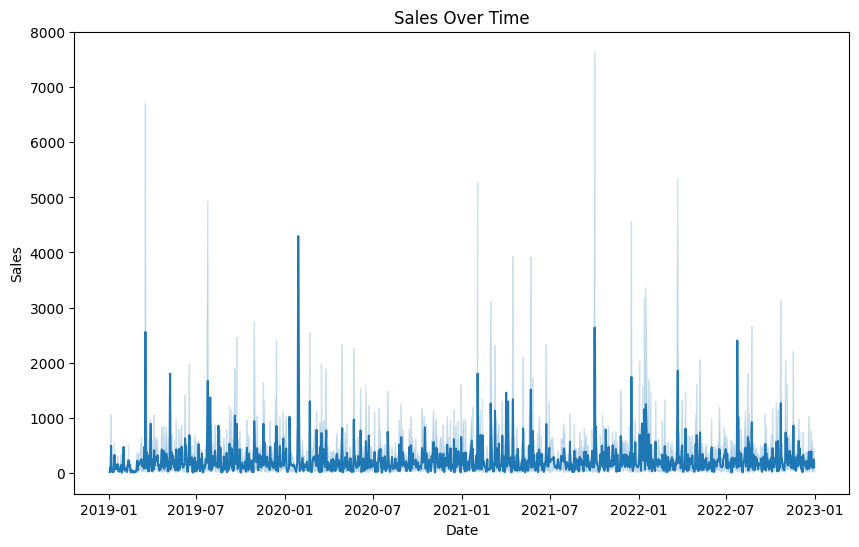

In [84]:
# Basic statistics
print(lg_data.describe())

# Check for missing values
print(lg_data.isnull().sum())

# Plotting sales trends
if 'Date' in lg_data.columns and 'Sales' in lg_data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Sales', data=lg_data)
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
else:
    print("Cannot plot the sales trend as 'Date' or 'Sales' columns are missing.")

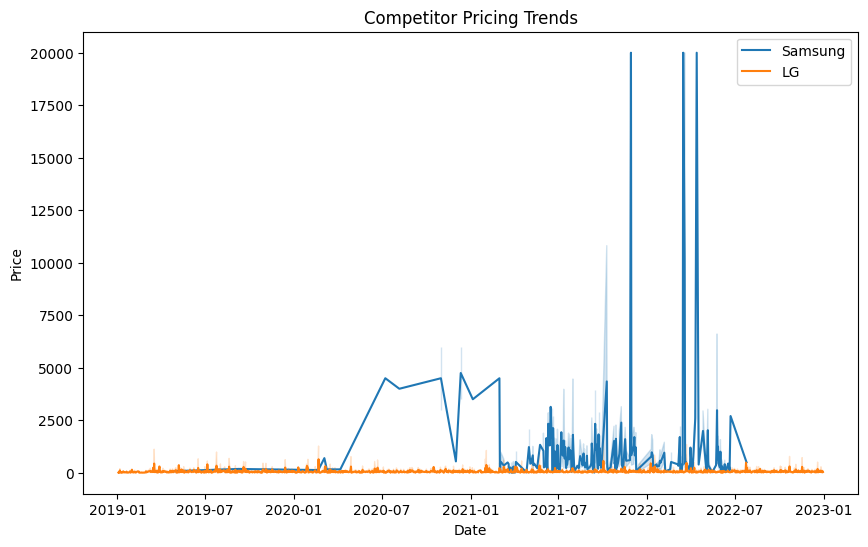

In [85]:
# Plotting competitor pricing trends
if 'Date' in lg_data.columns and 'Price' in lg_data.columns and 'Date' in competitor_data.columns and 'Price' in competitor_data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Price', data=competitor_data, label='Samsung')
    sns.lineplot(x='Date', y='Price', data=lg_data, label='LG')
    plt.title('Competitor Pricing Trends')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print("Cannot plot the pricing trends as 'Date' or 'Price' columns are missing in one of the datasets.")


        CustomerID          Age  Annual Income ($)  Average_Spend  \
count  2000.000000  2000.000000        2000.000000        2000.00   
mean   1000.500000    48.960000      110761.321500        5146.03   
std     577.494589    28.429747       45677.771898           0.00   
min       1.000000     0.000000        1000.000000        5146.03   
25%     500.750000    25.000000       74572.000000        5146.03   
50%    1000.500000    48.000000      110045.000000        5146.03   
75%    1500.250000    73.000000      149092.750000        5146.03   
max    2000.000000    99.000000      189974.000000        5146.03   

       Purchase_Frequency  Work Experience  Family Size  
count         2000.000000      2000.000000  2000.000000  
mean            51.042000         4.104500     3.768500  
std             27.907484         3.921131     1.970749  
min              1.000000         0.000000     1.000000  
25%             28.000000         1.000000     2.000000  
50%             50.000000     

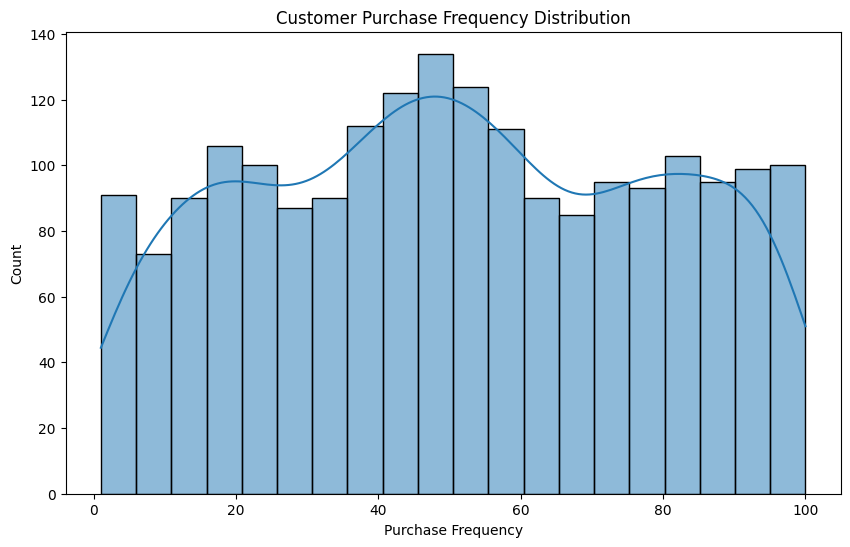

In [86]:
# Basic statistics
print(customer_data.describe())

# Check for missing values
print(customer_data.isnull().sum())

# Plotting customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Purchase_Frequency'], bins=20, kde=True)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()

In [87]:
# Handling missing values
lg_data = lg_data.dropna()
competitor_data = competitor_data.dropna()
customer_data = customer_data.dropna()

# Encoding categorical variables (if any)
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(customer_data[['Segment']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Segment']))

# Merging encoded features back into the customer dataframe
customer_data = customer_data.drop('Segment', axis=1)
customer_data = pd.concat([customer_data, encoded_df], axis=1)

# Normalizing numerical features
scaler = StandardScaler()
lg_data[['Price', 'Sales']] = scaler.fit_transform(lg_data[['Price', 'Sales']])
competitor_data['Price'] = scaler.fit_transform(competitor_data[['Price']])
customer_data[['Purchase_Frequency', 'Average_Spend']] = scaler.fit_transform(customer_data[['Purchase_Frequency', 'Average_Spend']])

In [92]:
# Creating new features (example: lagged prices)
lg_data['Lagged_Price'] = lg_data['Price'].shift(1)
competitor_data['Lagged_Price'] = competitor_data['Price'].shift(1)


# Merging datasets
merged_data = pd.merge(lg_data, competitor_data, on='Date', how='inner', suffixes=('_LG', '_Samsung',))

# Dropping rows with NaN values created by lagging
merged_data = merged_data.dropna()

# Aggregating customer data based on Segment or other relevant features
# Selecting only numeric columns for aggregation
numeric_columns = customer_data.select_dtypes(include=['float64', 'int64']).columns
customer_summary = customer_data.groupby('Segment')[numeric_columns].mean().reset_index()

# Adding a dummy 'Segment' column to merged_data to match the customer_summary
merged_data['Segment'] = 'Dummy_Segment'
customer_summary['Segment'] = 'Dummy_Segment'

# Merging customer summary with the merged_data
final_data = pd.merge(merged_data, customer_summary, on='Segment', how='inner')

# Displaying the final data
print(final_data.head())

         order_id       Date   ship_date        customer manufactory  \
0  US-2022-122518 2021-03-04  03/08/2021  Randy Ferguson       Avery   
1  US-2022-122518 2021-03-04  03/08/2021  Randy Ferguson       Avery   
2  US-2022-122518 2021-03-04  03/08/2021  Randy Ferguson       Avery   
3  US-2022-122518 2021-03-04  03/08/2021  Randy Ferguson       Avery   
4  US-2022-122518 2021-03-04  03/08/2021  Randy Ferguson       Avery   

  product_name    segment         category subcategory region  ...  \
0    Avery 518  Corporate  Office Supplies      Labels  South  ...   
1    Avery 518  Corporate  Office Supplies      Labels  South  ...   
2    Avery 518  Corporate  Office Supplies      Labels  South  ...   
3    Avery 518  Corporate  Office Supplies      Labels  South  ...   
4    Avery 518  Corporate  Office Supplies      Labels  South  ...   

        weight Lagged_Price_Samsung        Segment   CustomerID        Age  \
0  51.7 pounds               1445.5  Dummy_Segment   991.993600  49.

In [93]:
# Linear Regression for demand elasticity
X = final_data[['Price_LG', 'Lagged_Price_LG', 'Price_Samsung']]
y = final_data['Sales']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MAE: 104.17700358713968
R^2: 0.6387320276855816


Silhouette Score: 0.561684177114962


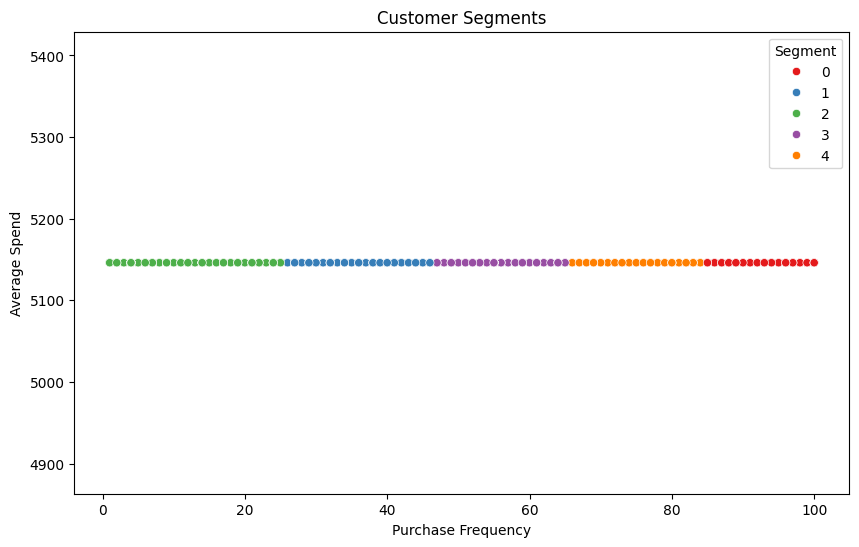

In [94]:
# K-Means Clustering for customer segmentation
X_customers = customer_data[['Purchase_Frequency', 'Average_Spend']]
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(X_customers)

# Evaluation
silhouette_avg = silhouette_score(X_customers, customer_data['Segment'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Frequency', y='Average_Spend', hue='Segment', data=customer_data, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Spend')
plt.show()

In [95]:
# Exporting the trained models
import joblib
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

# Ensuring dependencies are listed
requirements = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'joblib'
]

with open('requirements.txt', 'w') as f:
    for requirement in requirements:
        f.write(requirement + '\n')

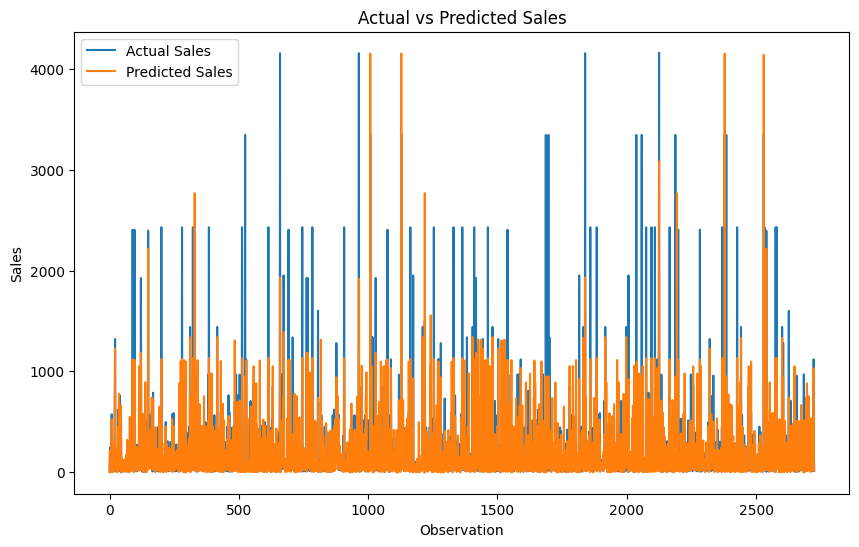

In [96]:
# Plotting actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.show()

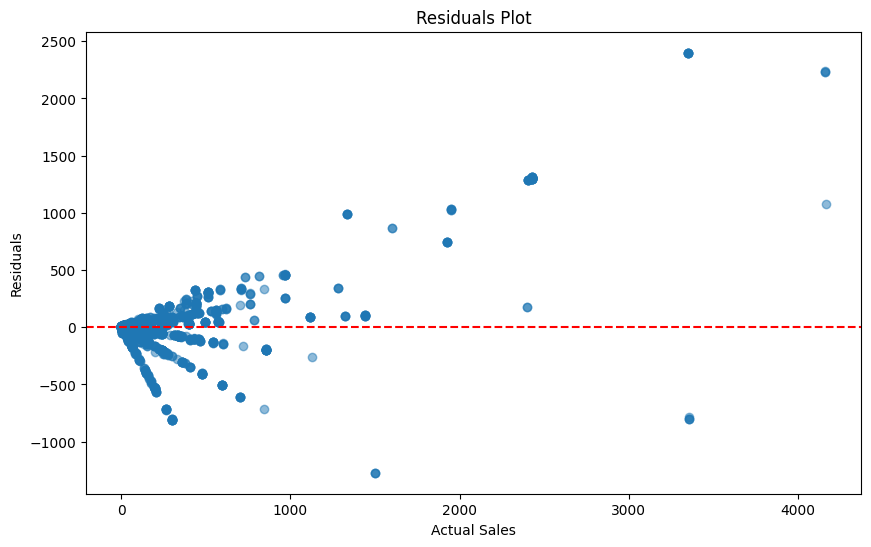

In [103]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.show()

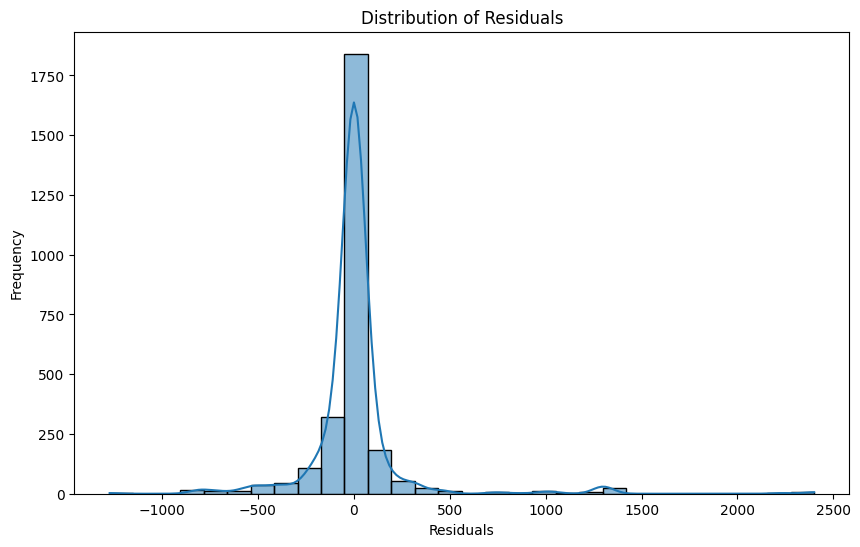

In [104]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


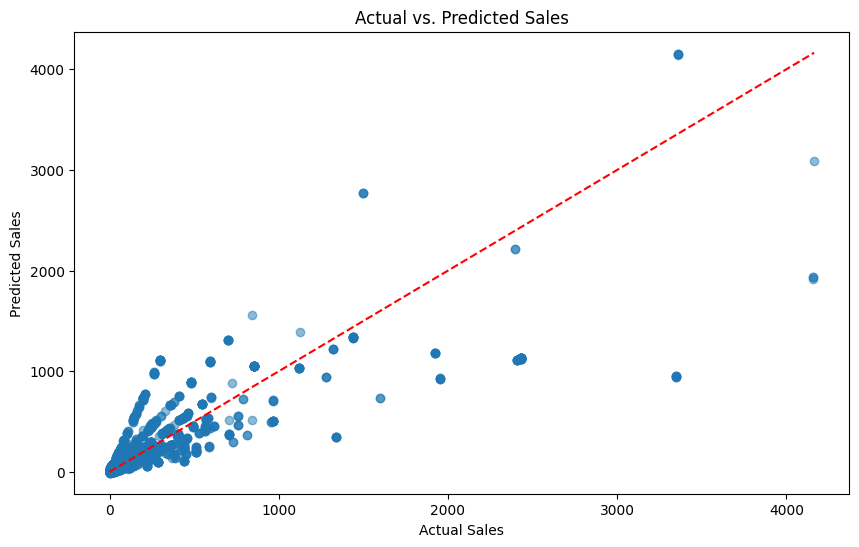

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

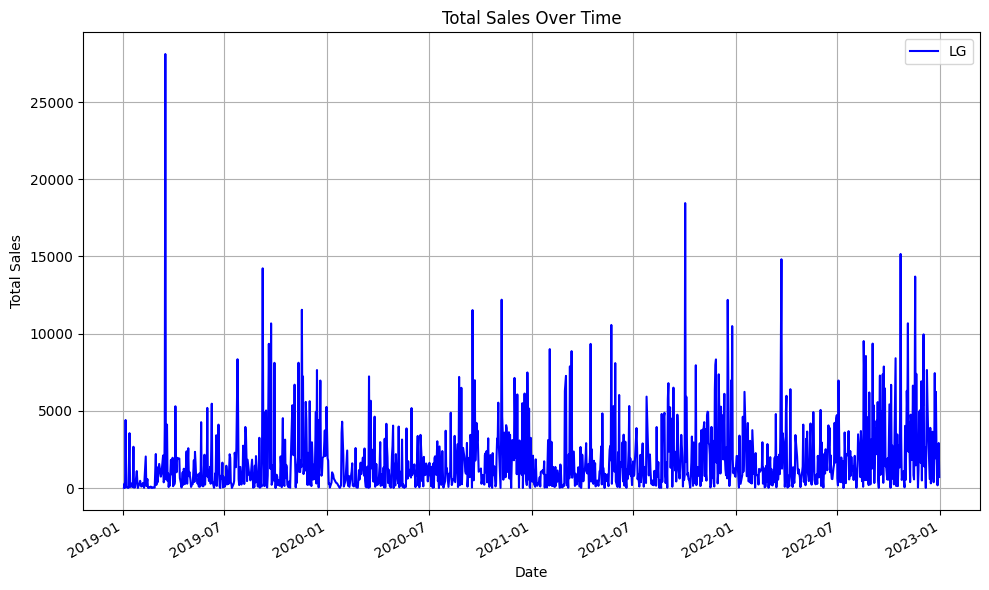

In [109]:
import matplotlib.pyplot as plt

# Calculate total sales for LG over time
lg_sales_over_time = lg_data.groupby('Date')['Sales'].sum()

# Calculate total sales for the competitor over time
#competitor_sales_over_time = competitor_data.groupby('Date')['Sales'].sum()

# Plotting the trends
plt.figure(figsize=(10, 6))
lg_sales_over_time.plot(label='LG', color='blue')
#competitor_sales_over_time.plot(label='Competitor', color='red')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\check\AppData\Local\Temp\ipykernel_19400\981976511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=customer_data, palette='viridis')


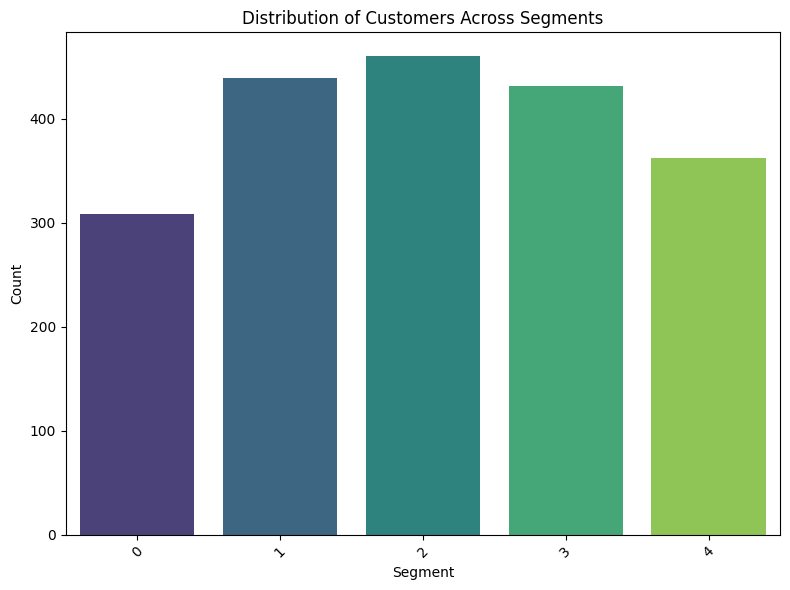

C:\Users\check\AppData\Local\Temp\ipykernel_19400\981976511.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Average_Spend', data=customer_data, palette='coolwarm')


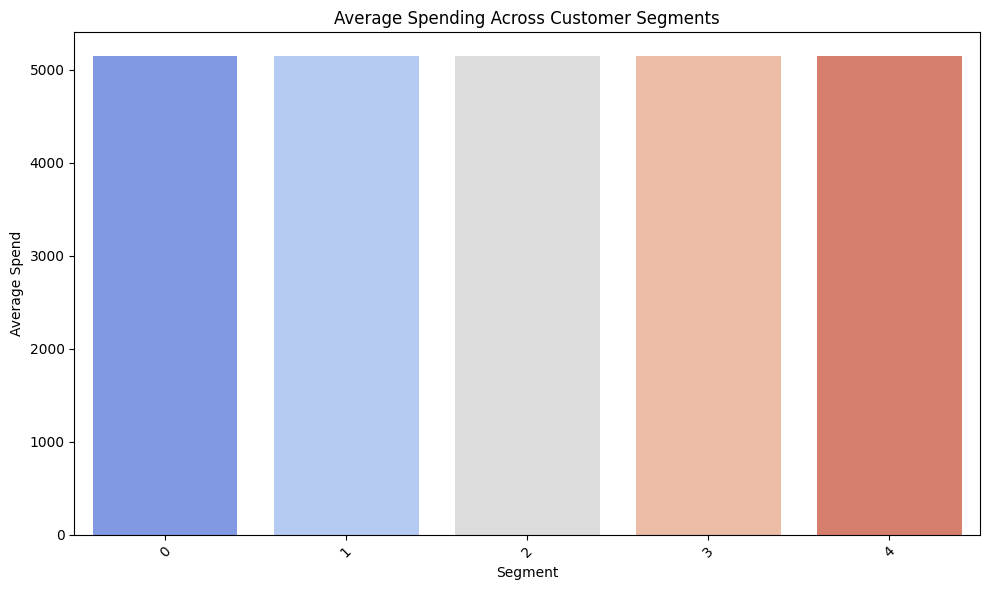

In [117]:
import seaborn as sns

# Visualize distribution of customers across segments
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=customer_data, palette='viridis')
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming 'Segment' and 'Average_Spend' columns exist in customer_data
# Compare average spending across segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Average_Spend', data=customer_data, palette='coolwarm')
plt.title('Average Spending Across Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

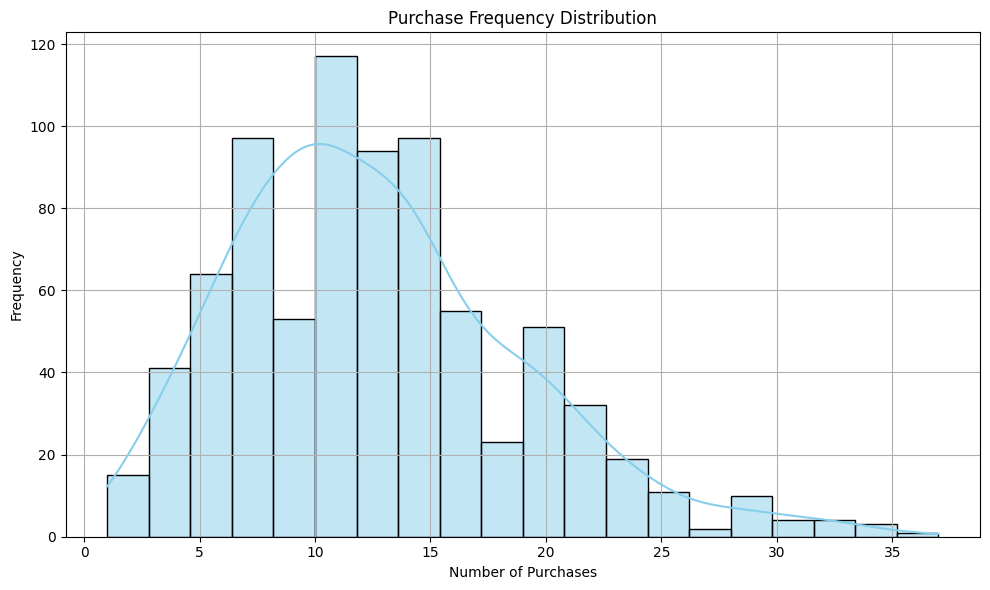

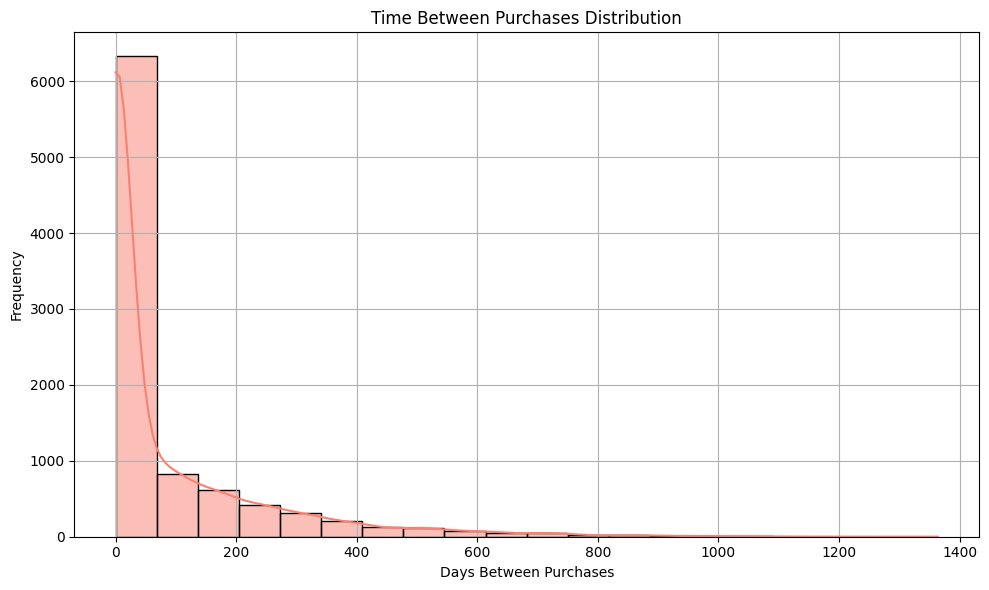

In [121]:
# Calculate purchase frequency for each customer
purchase_frequency = lg_data.groupby('customer')['Date'].count()

# Visualize purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=20, kde=True, color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate customer loyalty (time between consecutive purchases)
lg_data['Previous_Purchase_Date'] = lg_data.groupby('customer')['Date'].shift(1)
lg_data['Time_Between_Purchases'] = (lg_data['Date'] - lg_data['Previous_Purchase_Date']).dt.days

# Visualize distribution of time between purchases
plt.figure(figsize=(10, 6))
sns.histplot(lg_data['Time_Between_Purchases'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Time Between Purchases Distribution')
plt.xlabel('Days Between Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

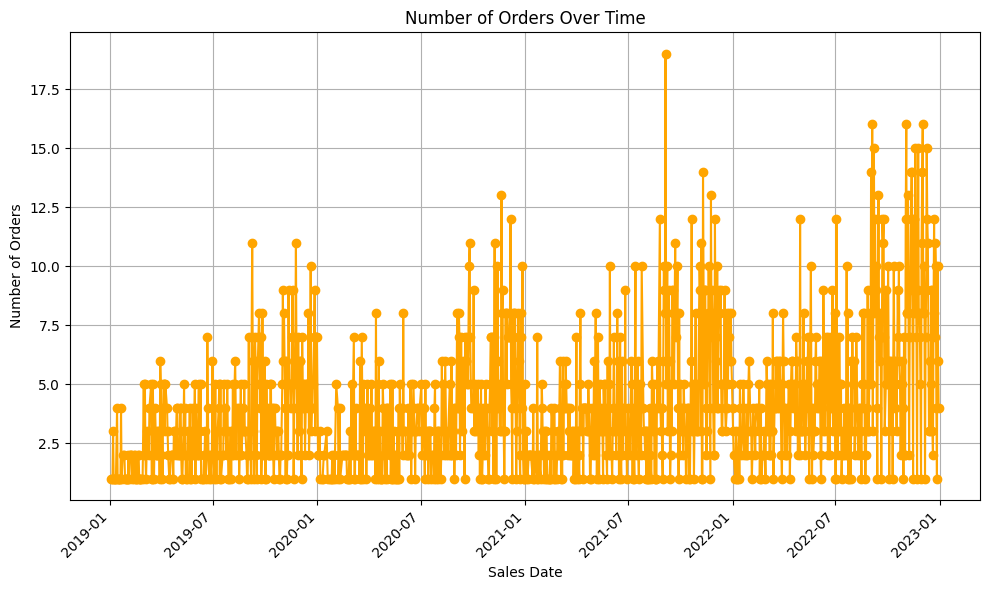

In [124]:
# Calculate the number of orders per day
orders_per_day = lg_data.groupby('Date')['order_id'].nunique()

# Plotting the number of orders over time
plt.figure(figsize=(10, 6))
orders_per_day.plot(marker='o', color='orange')
plt.title('Number of Orders Over Time')
plt.xlabel('Sales Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

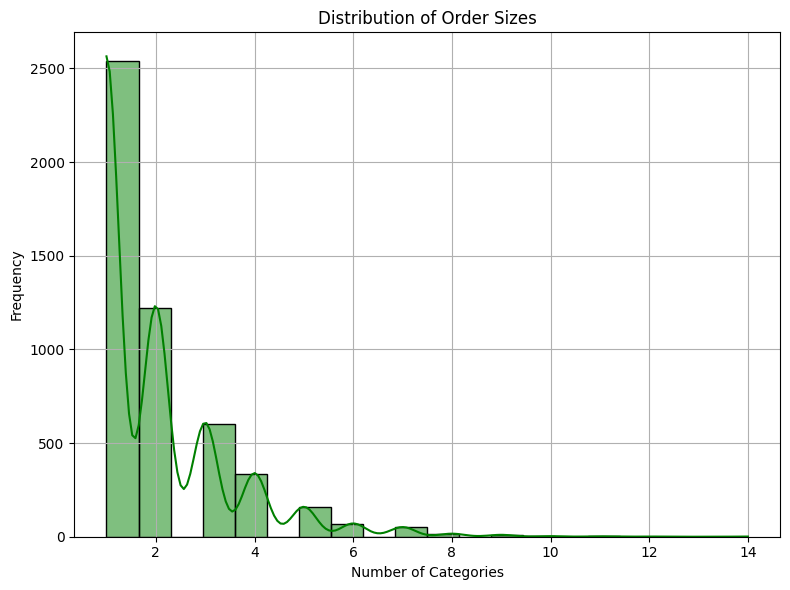

In [128]:
# Calculate the number of products per order
order_sizes = lg_data.groupby('order_id')['category'].count()

# Plotting the distribution of order sizes
plt.figure(figsize=(8, 6))
sns.histplot(order_sizes, bins=20, kde=True, color='green')
plt.title('Distribution of Order Sizes')
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

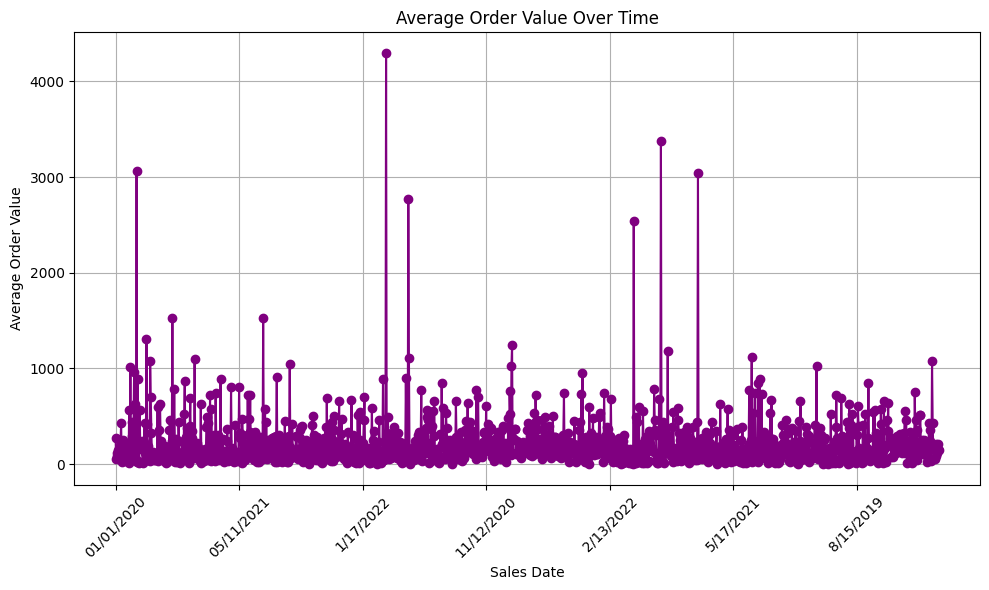

In [129]:
# Calculate the total sales amount per order
order_total_sales = lg_data.groupby('order_id')['Sales'].sum()

# Calculate the average order value per day
avg_order_value = lg_data.groupby('ship_date')['Sales'].mean()

# Plotting the average order value over time
plt.figure(figsize=(10, 6))
avg_order_value.plot(marker='o', color='purple')
plt.title('Average Order Value Over Time')
plt.xlabel('Ship Date')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

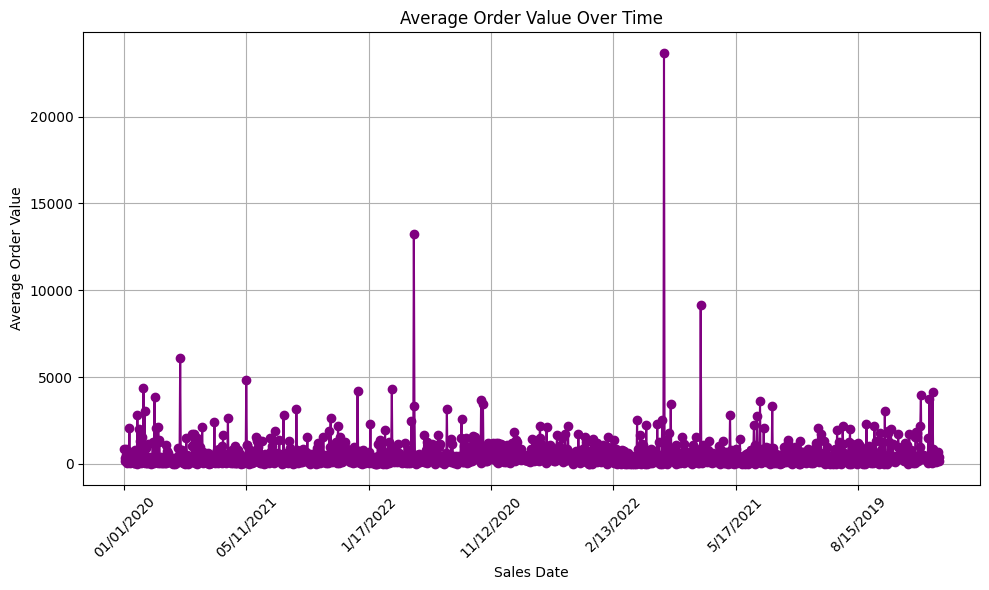

In [130]:
# Calculate the total sales amount per order
order_total_sales = lg_data.groupby('order_id')['Sales'].sum()

# Merge order_total_sales back to lg_data to associate total sales with each order
lg_data_with_totals = lg_data.merge(order_total_sales, left_on='order_id', right_index=True, suffixes=('', '_total'))

# Calculate the average order value per day
avg_order_value = lg_data_with_totals.groupby('ship_date')['Sales_total'].mean()

# Plotting the average order value over time
plt.figure(figsize=(10, 6))
avg_order_value.plot(marker='o', color='purple')
plt.title('Average Order Value Over Time')
plt.xlabel('Sales Date')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

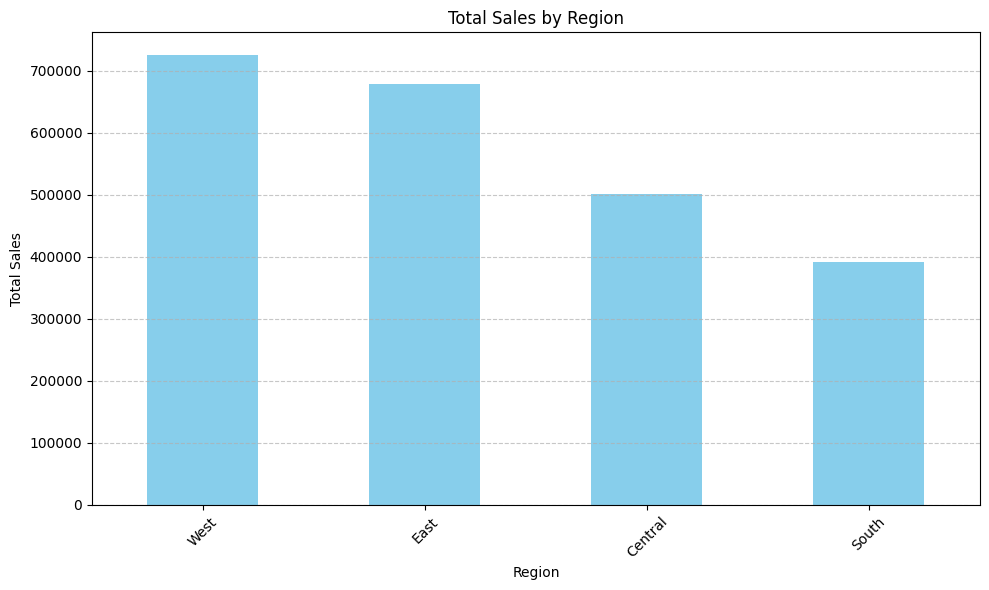

In [131]:
# Calculate total sales by region
region_sales = lg_data.groupby('region')['Sales'].sum()

# Visualize sales performance by region
plt.figure(figsize=(10, 6))
region_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


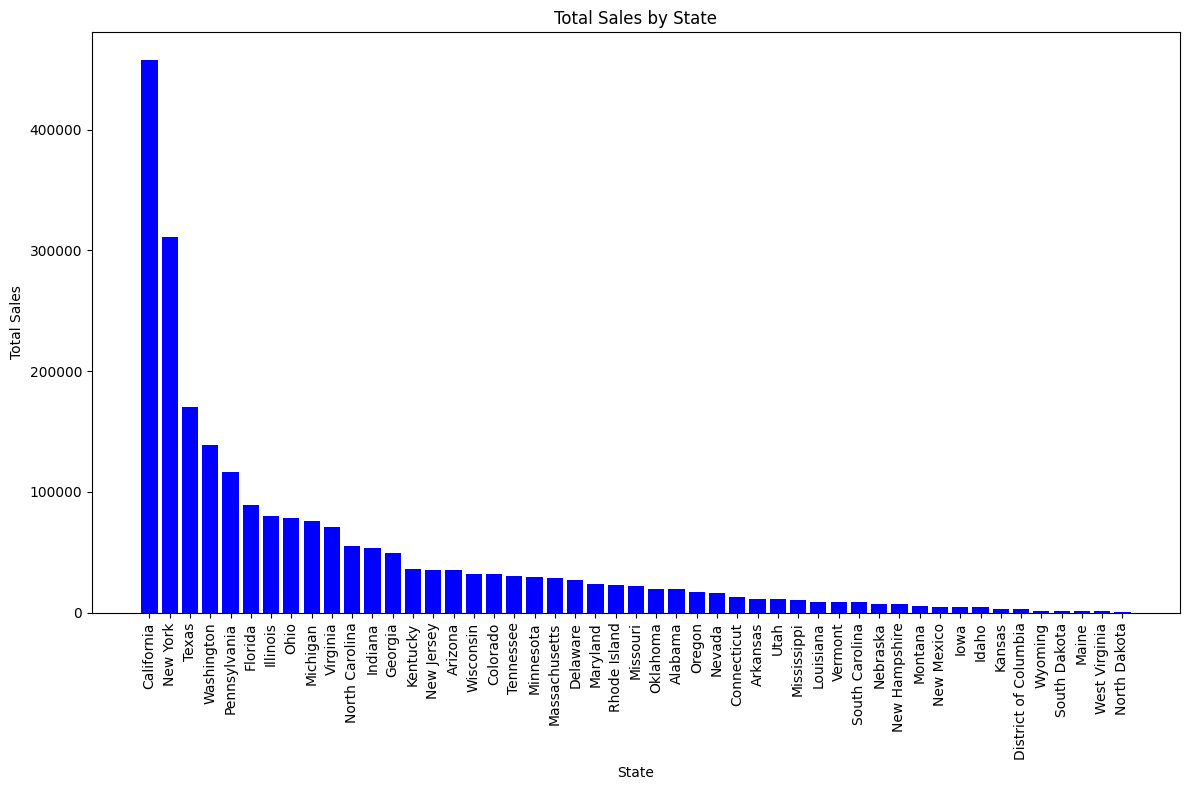

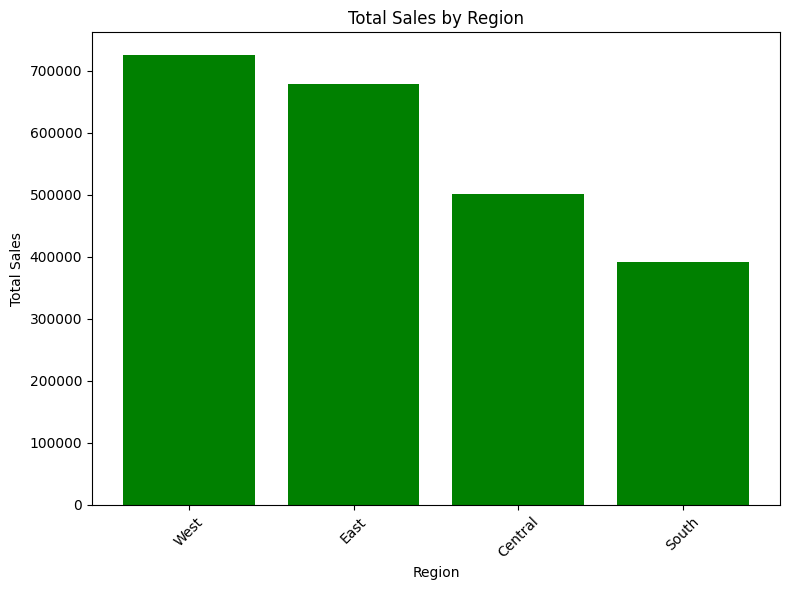

In [147]:
if 'state' in lg_data.columns and 'region' in lg_data.columns:
    # Aggregate sales by state
    state_sales = lg_data.groupby('state')['Sales'].sum().reset_index()

    # Aggregate sales by region
    region_sales = lg_data.groupby('region')['Sales'].sum().reset_index()

    # Plot total sales by state
    plt.figure(figsize=(12, 8))
    state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)
    plt.bar(state_sales_sorted['state'], state_sales_sorted['Sales'], color='blue')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    plt.title('Total Sales by State')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot total sales by region
    plt.figure(figsize=(8, 6))
    region_sales_sorted = region_sales.sort_values(by='Sales', ascending=False)
    plt.bar(region_sales_sorted['region'], region_sales_sorted['Sales'], color='green')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.title('Total Sales by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("State and/or Region columns are not available in the dataset.")